In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"c:\Users\LENOVO\OneDrive\Dokumenti\ola dataset.csv")

# Initial structure and inspection
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   weather     10886 non-null  int64  
 3   temp        9254 non-null   float64
 4   humidity    9254 non-null   float64
 5   windspeed   9254 non-null   float64
 6   casual      10886 non-null  int64  
 7   registered  10886 non-null  int64  
 8   count       10886 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 765.6+ KB
None
              datetime  season  weather       temp    humidity  windspeed  \
0  2011-01-01 00:00:00       3        2   7.653428  122.430885  18.783703   
1  2011-01-01 01:00:00       4        3  13.269244  101.703802  14.035245   
2  2011-01-01 02:00:00       1        3  30.886922   77.583743  45.365080   
3  2011-01-01 03:00:00       3        1  10.463377  114.925671  

In [2]:
# Convert 'datetime' to datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# Create new time-based features
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['dayofweek'] = df['datetime'].dt.dayofweek


In [3]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicates = df.duplicated().sum()
print("Duplicate Rows:", duplicates)


Missing Values:
 datetime         0
season           0
weather          0
temp          1632
humidity      1632
windspeed     1632
casual           0
registered       0
count            0
hour             0
day              0
month            0
year             0
dayofweek        0
dtype: int64
Duplicate Rows: 0


In [10]:
# Fill missing values with column mean
df['temp'].fillna(df['temp'].mean(), inplace=True)
df['humidity'].fillna(df['humidity'].mean(), inplace=True)
df['windspeed'].fillna(df['windspeed'].mean(), inplace=True)

# Verify missing values have been handled
print("Post-Cleaning Missing Values:\n", df.isnull().sum())

# Preview cleaned data
print(df.head())

Post-Cleaning Missing Values:
 datetime      0
season        0
weather       0
temp          0
humidity      0
windspeed     0
casual        0
registered    0
count         0
hour          0
day           0
month         0
year          0
dayofweek     0
dtype: int64
             datetime  season  weather       temp    humidity  windspeed  \
0 2011-01-01 00:00:00       3        2   7.653428  122.430885  18.783703   
1 2011-01-01 01:00:00       4        3  13.269244  101.703802  14.035245   
2 2011-01-01 02:00:00       1        3  30.886922   77.583743  45.365080   
3 2011-01-01 03:00:00       3        1  10.463377  114.925671  25.347168   
4 2011-01-01 04:00:00       3        4  30.214783  149.193592  20.288982   

   casual  registered       count  hour  day  month  year  dayofweek  
0       5         128  315.731778     0    1      1  2011          5  
1      36         184  340.457093     1    1      1  2011          5  
2      34          97  224.278595     2    1      1  2011     

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4552\2062290688.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['temp'].fillna(df['temp'].mean(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4552\2062290688.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [5]:
#import libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**# visualizations & Analysis**

In [ ]:


# Set visual style
#
sns.set(style="whitegrid", palette="muted")



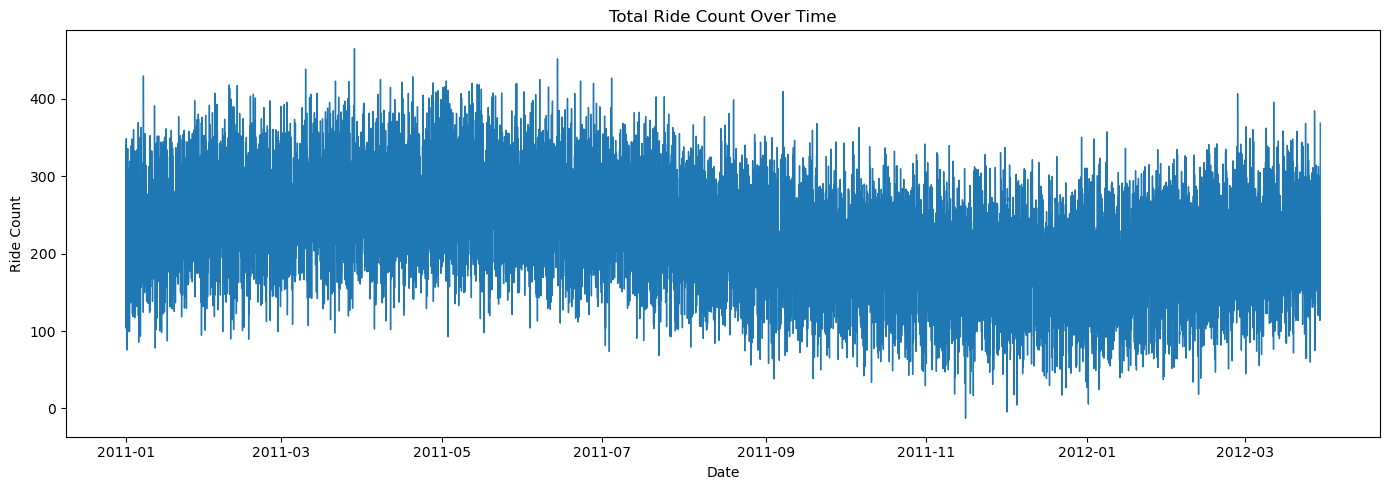

In [6]:
# Plot 1: Ride count over time
plt.figure(figsize=(14, 5))
plt.plot(df['datetime'], df['count'], color='tab:blue', linewidth=1)
plt.title('Total Ride Count Over Time')
plt.xlabel('Date')
plt.ylabel('Ride Count')
plt.tight_layout()
plt.show()



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4552\2354197994.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='hour', y='count', estimator=np.mean, ci=None)


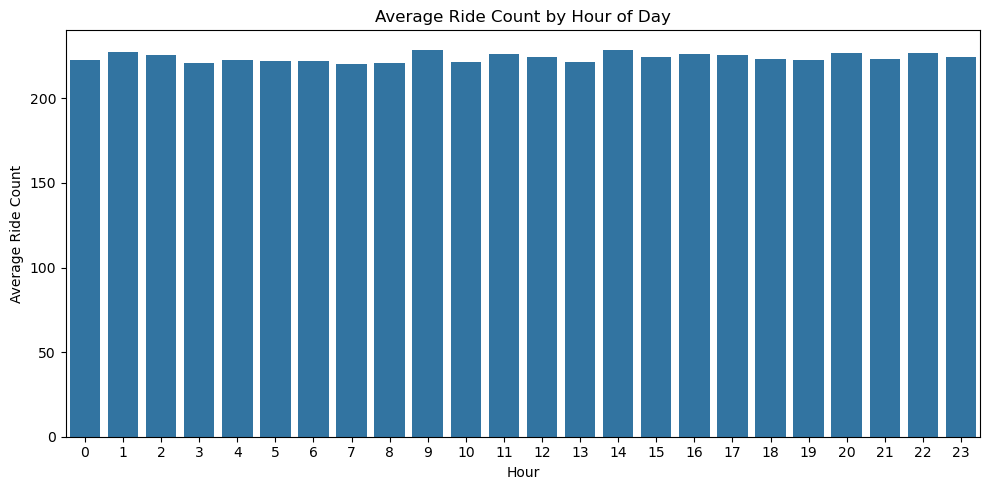

In [7]:
# Plot 2: Average ride count by hour
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='hour', y='count', estimator=np.mean, ci=None)
plt.title('Average Ride Count by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Ride Count')
plt.tight_layout()
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4552\759322437.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='dayofweek', y='count', estimator=np.mean, ci=None)


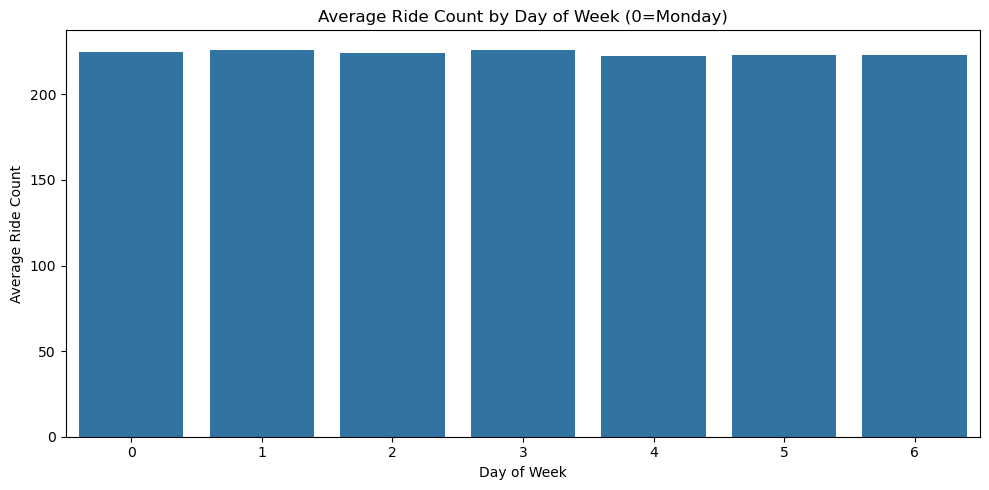

In [8]:
# Plot 3: Average ride count by day of week
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='dayofweek', y='count', estimator=np.mean, ci=None)
plt.title('Average Ride Count by Day of Week (0=Monday)')
plt.xlabel('Day of Week')
plt.ylabel('Average Ride Count')
plt.tight_layout()
plt.show()


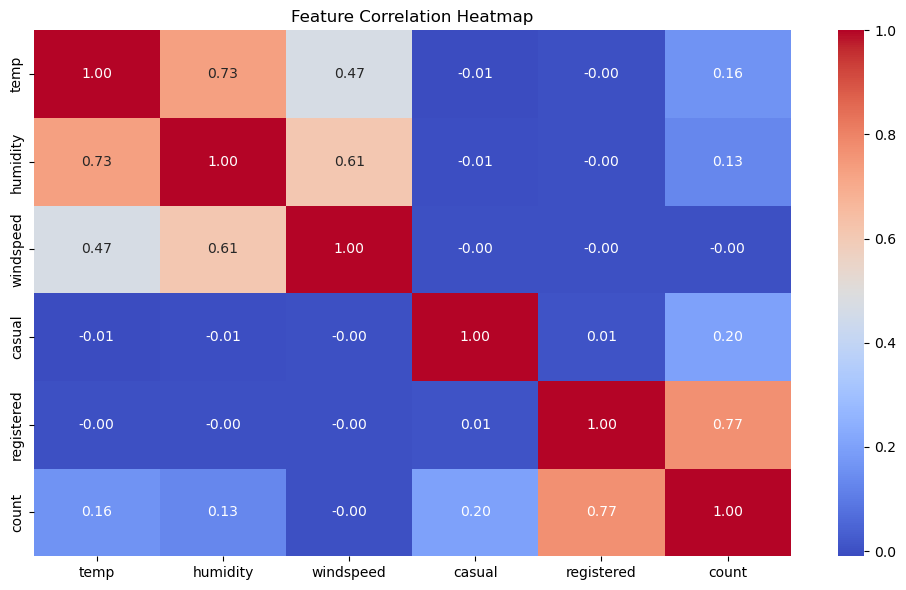

In [9]:
# Plot 4: Correlation heatmap
plt.figure(figsize=(10, 6))
corr = df[['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

#insights 
